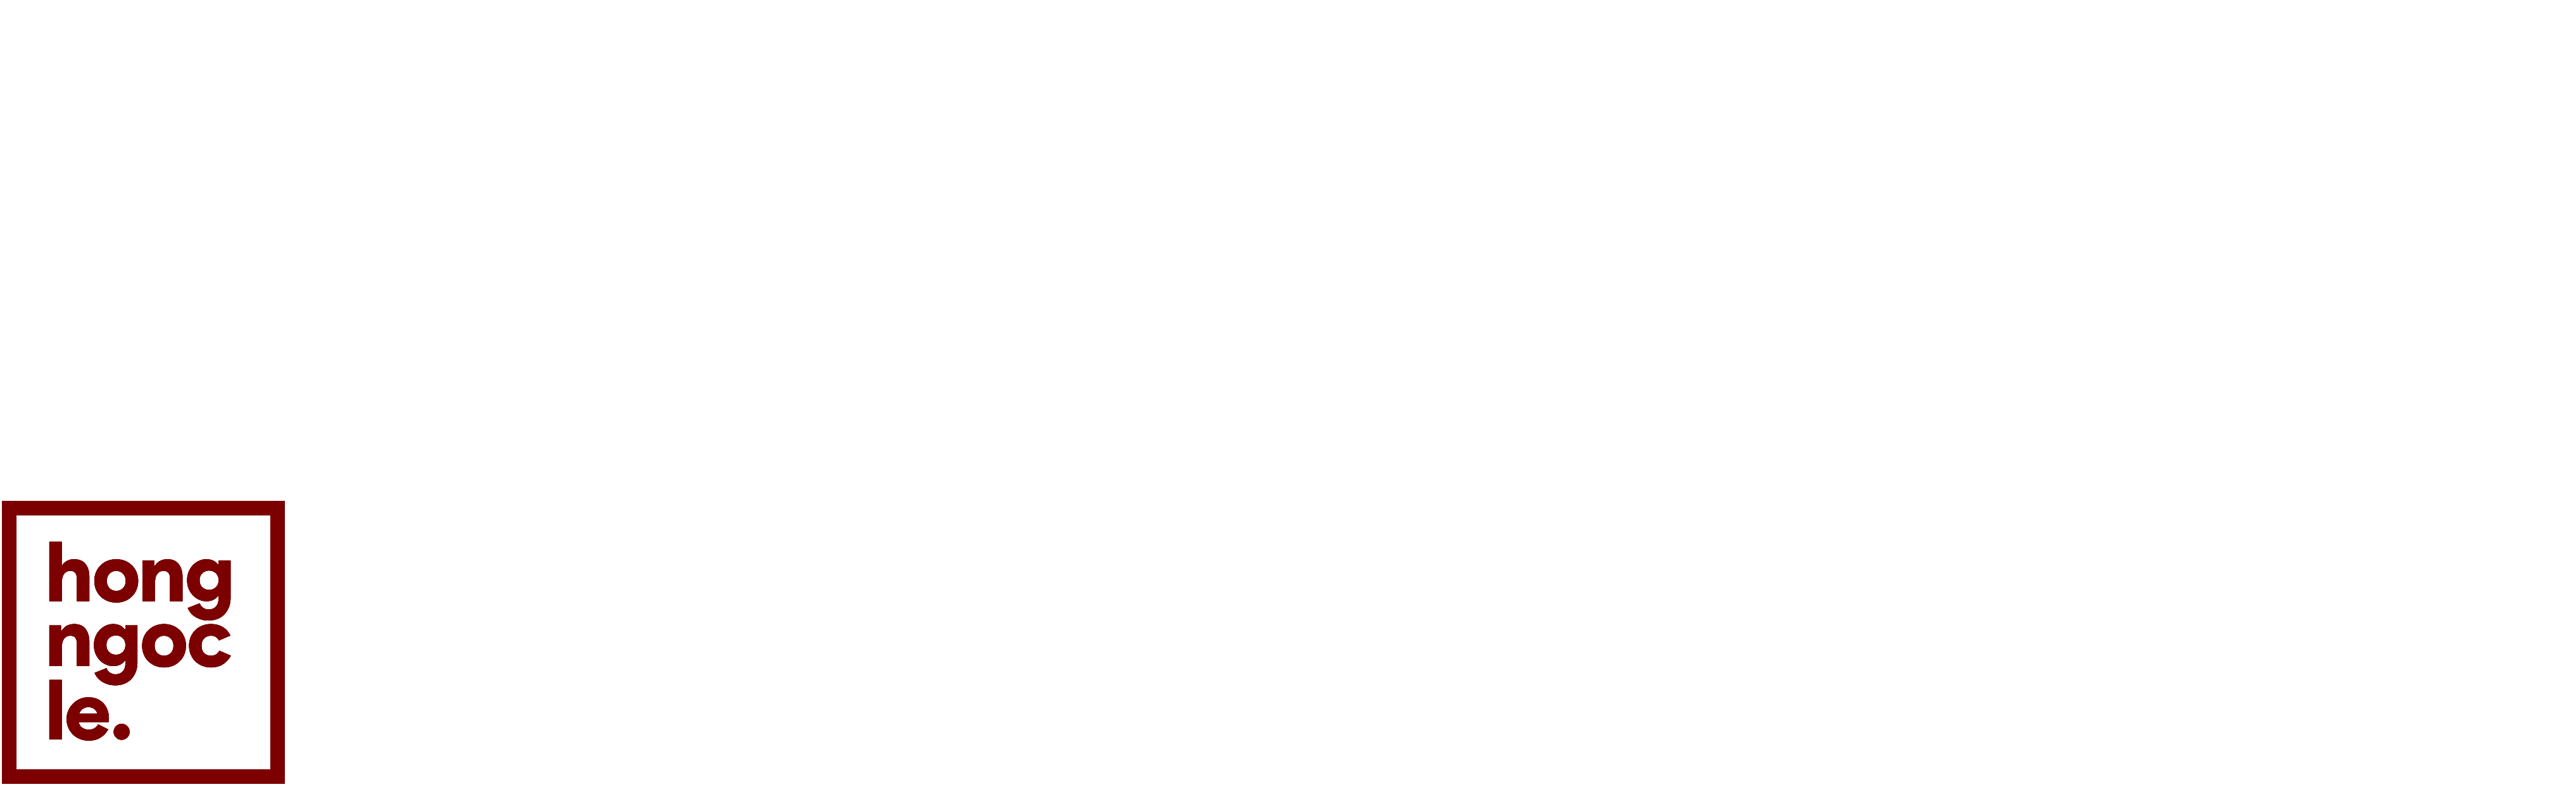

# Loan approval prediction using k-Nearest-Neighbour model

## Contents

[**1. Introduction**](#1-introduction)

[**2. Loading libraries and data**](#2-loading-libraries-and-data)
* [2.1. Importing libraries](#21-importing-libraries)
* [2.2. Loading data](#22-loading-data)

[**3. Data wrangling**](#3-data-wrangling)
* [3.1. Checking for duplicates](#31-checking-for-duplicates)
* [3.2. Data types overview](#32-data-types-overview)
* [3.3. Data imputation](#33-data-imputation)

[**4. Building K-nearest-neighbour model**](#4-building-k-nearest-neighbour-model)
* [4.1. Categorical data transformation](#41-categorical-data-transformation)
* [4.2. Splitting data into train set and test set](#42-splitting-data-into-train-set-and-test-set)
* [4.3. Constructing the k-NN model](#43-constructing-the-k-nn-model)

[**5. Evaluating accuracy of KNN model**](#5-evaluating-accuracy-of-knn-model)
* [5.1. Model evaluation](#51-model-evaluation)
* [5.2. Feature engineering - Improving model accuracy](#52-feature-engineering---improving-model-accuracy)

<a name="1-introduction"></a>
## 1. Introduction

This project has 3 primary objectives:
1. **Data wrangling**: Undertake thorough data wrangling processes to ensure data quality and prepare it for further analysis.
2. **Predictive modelling**: Construct and implement a K-Nearest Neighbours (KNN) model to predict loan approval outcomes based on each applicant's attributes.
3. **Feature engineering** Apply simple linear regression to assess the relevancy of predictor variables in order to enhance the predictive capabilities of the KNN model.

### Scope
The dataset can be accessed [here](https://drive.google.com/file/d/1LIvIdqdHDFEGnfzIgEh4L6GFirzsE3US/view?usp=sharing). It encompasses information from 598 loan applications, covering variables like Gender, Marital Status, Dependents, Education, Self-Employed status, Applicant Income, Coapplicant Income, Loan Amount, Loan Amount Term, Credit History, and Property Area.

### Inquiry questions

* How do different factors such as credit history, marital status, and income contribute to loan approval?
* What is the accuracy of the custom-built KNN model in predicting loan approval status?
* How could the model be improved through feature engineering?

### Project outline

The project begins with importing necessary libraries and loading the loan dataset for analysis (Section 2). Subsequently, Section 3 analyses the dataset, covering descriptive statistics, handling missing values, and ensuring data integrity. Section 4 is dedicated to constructing the K-nearest-neighbour model. Section 5 evaluates the accuracy of the constructed model while Section 6 further explores a simple feature engineering approach using simple linear regression to refine the model.

<a name="2-loading-libraries-and-data"></a>
## 2. Loading libraries and data

<a name="21-importing-libraries"></a>
### 2.1. Importing libraries

In [1]:
# Import necessary libraries
import numpy as np
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

sns.set_style('dark')
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)

<a name="22-loading-data"></a>
### 2.2. Loading data

In [2]:
data = pd.read_csv('LoanApprovalPrediction.csv')
display(data)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.00,Graduate,No,5849,0.00,NaN,360.00,1.00,Urban,Y
1,LP001003,Male,Yes,1.00,Graduate,No,4583,1508.00,128.00,360.00,1.00,Rural,N
2,LP001005,Male,Yes,0.00,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
3,LP001006,Male,Yes,0.00,Not Graduate,No,2583,2358.00,120.00,360.00,1.00,Urban,Y
4,LP001008,Male,No,0.00,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.00,Graduate,No,2900,0.00,71.00,360.00,1.00,Rural,Y
594,LP002979,Male,Yes,3.00,Graduate,No,4106,0.00,40.00,180.00,1.00,Rural,Y
595,LP002983,Male,Yes,1.00,Graduate,No,8072,240.00,253.00,360.00,1.00,Urban,Y
596,LP002984,Male,Yes,2.00,Graduate,No,7583,0.00,187.00,360.00,1.00,Urban,Y


A description of the variables could be found [here](https://www.geeksforgeeks.org/loan-approval-prediction-using-machine-learning/).

| Column            | Description                                           |
|-------------------|-------------------------------------------------------|
| Loan              | A unique id                                           |
| Gender            | Gender of the applicant (Male/Female)                 |
| Married           | Marital Status of the applicant (Yes/No)              |
| Dependents        | Presence of dependents                                |
| Education         | Educational status (Graduated/Not Graduated)          |
| Self_Employed     | Self-employment status (Yes/No)                       |
| ApplicantIncome   | Applicant's income                                    |
| CoapplicantIncome | Co-applicant's income                                 |
| LoanAmount        | Loan amount (in thousands)                            |
| Loan_Amount_Term  | Terms of the loan (in months)                         |
| Credit_History    | Credit history of individual’s repayment of debts     |
| Property_Area      | Area of the property (Rural/Urban/Semi-urban)         |
| Loan_Status       | Loan approval status (Y- Yes, N- No)                 |


<a name="3-data-wrangling"></a>
## 3. Data wrangling

<a name="31-checking-for-duplicates"></a>
### 3.1. Checking for duplicates

First we will be checking for any duplicated Loan IDs in the data set.

In [3]:
duplicates = data['Loan_ID'].duplicated()
print(f'Duplicates: {duplicates.sum()}')

Duplicates: 0


<a name="32-data-types-overview"></a>
### 3.2. Data types overview

Since there are no issues with duplicated data, next we can use `info()` to quickly view the data types of each of the variables.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


`Gender`, `Married`, `Education`, `Self_Employed`, `Property_Area`, and `Loan_Status` are categorical data; hence, they will be converted into dummy variables in a subsequent section.

In [5]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.00,598.00,598.00,577.00,584.00,549.00
mean,0.76,5292.25,1631.50,144.97,341.92,0.84
std,1.01,5807.27,2953.32,82.70,65.21,0.36
min,0.00,150.00,0.00,9.00,12.00,0.00
25%,0.00,2877.50,0.00,100.00,360.00,1.00
50%,0.00,3806.00,1211.50,127.00,360.00,1.00
75%,1.75,5746.00,2324.00,167.00,360.00,1.00
max,3.00,81000.00,41667.00,650.00,480.00,1.00


<a name="33-data-imputation"></a>
### 3.3. Data imputation

In [6]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

After discovering the number of blank fields in the dataset, I will employ the data imputation method of replacing both numerical and categorical attributes with the mode (for categorical) or mean (for numerical) values.

In [7]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mean())
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mean())

data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Since there are no missing values, we can proceed with the model training.

<a name="4-building-k-nearest-neighbour-model"></a>
## 4. Building K-nearest-neighbour model

<a name="41-categorical-data-transformation"></a>
### 4.1. Categorical data transformation

Firstly, we need to make all categorical data variables understandable for machines. To achieve this, I'll convert them into dummy variables using the `LabelEncoder()`.

In [8]:
categorical = [
    'Gender',
    'Married',
    'Education',
    'Self_Employed',
    'Property_Area',
    'Loan_Status'
]

label_encoder = LabelEncoder()

for col in categorical:
    data[col] = label_encoder.fit_transform(data[col])

display(data.head())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.00,0,0,5849,0.00,144.97,360.00,1.00,2,1
1,LP001003,1,1,1.00,0,0,4583,1508.00,128.00,360.00,1.00,0,0
2,LP001005,1,1,0.00,0,1,3000,0.00,66.00,360.00,1.00,2,1
3,LP001006,1,1,0.00,1,0,2583,2358.00,120.00,360.00,1.00,2,1
4,LP001008,1,0,0.00,0,0,6000,0.00,141.00,360.00,1.00,2,1


<a name="42-splitting-data-into-train-set-and-test-set"></a>
### 4.2. Splitting data into train set and test set

Subsequently, we will split the data into training and testing sets, allocating a 20% ratio for testing.

In [9]:
train, test = train_test_split(
    data,
    test_size = 0.2, 
    random_state = 2024)

train = train.reset_index(drop = True)
test = test.reset_index(drop = True)

display(train)
display(test)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002729,1,0,1.00,0,0,11250,0.00,196.00,360.00,0.84,1,0
1,LP002974,1,1,0.00,0,0,3232,1950.00,108.00,360.00,1.00,0,1
2,LP001213,1,1,1.00,0,0,4945,0.00,144.97,360.00,0.00,0,0
3,LP002716,1,0,0.00,1,0,6783,0.00,130.00,360.00,1.00,1,1
4,LP001322,1,0,0.00,0,0,4133,0.00,122.00,360.00,1.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,LP001643,1,1,0.00,0,0,2383,2138.00,58.00,360.00,0.84,0,1
474,LP002455,1,1,2.00,0,0,3859,0.00,96.00,360.00,1.00,1,1
475,LP002813,0,1,1.00,0,1,19484,0.00,600.00,360.00,1.00,1,1
476,LP002785,1,1,1.00,0,0,3333,3250.00,158.00,360.00,1.00,2,1


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001734,0,1,2.00,0,0,4283,2383.00,127.00,360.00,0.84,1,1
1,LP001350,1,1,0.76,0,0,13650,0.00,144.97,360.00,1.00,2,1
2,LP001003,1,1,1.00,0,0,4583,1508.00,128.00,360.00,1.00,0,0
3,LP001586,1,1,3.00,1,0,3522,0.00,81.00,180.00,1.00,0,0
4,LP002140,1,0,0.00,0,0,8750,4167.00,308.00,360.00,1.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,LP001507,1,1,0.00,0,0,2698,2034.00,122.00,360.00,1.00,1,1
116,LP002926,1,1,2.00,0,1,2726,0.00,106.00,360.00,0.00,1,0
117,LP002833,1,1,0.00,1,0,4467,0.00,120.00,360.00,0.84,0,1
118,LP001497,1,1,2.00,0,0,5042,2083.00,185.00,360.00,1.00,0,0


<a name="43-constructing-the-k-nn-model"></a>

### 4.3. Constructing the k-NN model

In [10]:
def distance(point1, point2):
  '''
  Input:
    > point1: Array containing the coordinates of the first point
    > point2: Array containing the coordinates of the second point
  Output:
    > Distance between point1 and point2
  '''
  return np.sqrt(np.sum((point1 - point2)**2))

In [11]:
def fast_distances(input_row, train_set):
  '''
  Input:
    > input_row: A row of features for a test instance
    > train_set: A table of features for training instances
  Output:
    > Array of distances between input_row and each row in train_set
  '''

  train_copy = train_set.drop(columns = ['Loan_ID', 'Loan_Status'])
  input_row = input_row.drop(['Loan_ID', 'Loan_Status'])
  input_row = input_row.apply(pd.to_numeric, errors = 'coerce')

  train_matrix = np.asarray(train_copy)
  test_array = np.asarray(input_row)
  distances = np.sqrt(np.sum((train_matrix - test_array)**2, axis=1))

  # Add a small amount of noise for tie-breaking purposes
  np.random.seed(0)
  eps = np.random.uniform(size = distances.shape) * 1e-10
  distances = distances + eps
  return distances

Let's pick a row from the test set to test out the functions above.

In [12]:
test_1 = test.iloc[5]
test_1

Loan_ID              LP001112
Gender                      0
Married                     1
Dependents               0.00
Education                   0
Self_Employed               0
ApplicantIncome          3667
CoapplicantIncome     1459.00
LoanAmount             144.00
Loan_Amount_Term       360.00
Credit_History           1.00
Property_Area               1
Loan_Status                 1
Name: 5, dtype: object

In [13]:
fast_distances(test_1, train)

array([ 7722.26,   656.97,  1939.58, ..., 15890.69,  1821.93,  1484.04])

In [14]:
test_2 = test.iloc[0]

In [15]:
fast_distances(test_2, train)

array([ 7363.6 ,  1136.86,  2473.31, ..., 15393.92,  1286.53,  2541.54])

In [16]:
def k_nearest_neighbours_model(input_row, train_set, k):
  '''
  Input:
    > input_row: A row of features for a test instance
    > train_set: A table of features for training instances
    > k: Number of nearest neighbors to consider
  Output:
    > Majority classification of the 'k' nearest neighbors for the given input_row
  '''

  # Compute distances and create a distance column
  distances_array = fast_distances(input_row, train_set)
  train_distances = pd.DataFrame({'Distance': distances_array})
  all_info = train.merge(train_distances, left_index = True, right_index = True)

  # Identify classification of the majority of 'k' nearest neighbours
  k_neighbours = all_info.sort_values(by = 'Distance', ascending = True)
  k_nearest_neighbours = k_neighbours.head(k)
  mode = k_nearest_neighbours['Loan_Status'].mode().loc[0]
  
  return mode

In [17]:
k_nearest_neighbours_model(test_1, train, 3)

1

<a name="5-evaluating-accuracy-of-knn-model"></a>
## 5. Evaluating accuracy of KNN model

<a name="51-model-evaluation"></a>
### 5.1. Model evaluation


Now that a k-NN model has been constructed and tested for some individual instances, let's see how accurate it is on the whole test set.

In [18]:
def evaluate_accuracy(test_set, train_set, k):
    '''
    Input:
        > test_set: Table of test instances for evaluation
        > train_set: Table of training instances
        > k: Number of nearest neighbors to consider for the k-nearest neighbors model
    Output:
        > Print accuracy percentage and return a table with prediction and correctness information for the first 5 instances in the test set
    '''

    test_accuracy_table = test_set.copy()

    prediction = test_accuracy_table.apply(
        lambda row: k_nearest_neighbours_model(row, train_set, k),
        axis = 1)

    test_accuracy_table['prediction'] = prediction
    test_accuracy_table['correct'] = (
        test_accuracy_table['prediction'] == test_accuracy_table['Loan_Status'])

    accuracy = (
        test_accuracy_table['correct'].value_counts()[True] /
        test_accuracy_table.shape[0])

    print(f'Accuracy: {accuracy*100:.2f}%')

    return test_accuracy_table.head(2)

In [19]:
evaluate_accuracy(test, train, 3)

Accuracy: 61.67%


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,prediction,correct
0,LP001734,0,1,2.00,0,0,4283,2383.00,127.00,360.00,0.84,1,1,0,False
1,LP001350,1,1,0.76,0,0,13650,0.00,144.97,360.00,1.00,2,1,1,True


<a name="52-feature-engineering---improving-model-accuracy"></a>
### 5.2. Feature engineering - Improving model accuracy

Unfortunately, utilising all features comes with some downsides. A notable drawback is computational – computing Euclidean distances takes a considerable amount of time with a high number of features. Additionally, the inclusion of irrelevant variables may introduce bias. Therefore, the preference is for discriminative features – those that contribute to accurately classifying the test set as much as possible. This process, aimed at improving the performance of a classifier, is commonly referred to as feature selection or, more broadly, feature engineering.

I will be using simple linear regression from `statsmodels` to have a quick glimpse into what variables have the most significant influence on the response variable.  

In [20]:
import statsmodels.formula.api as smf

reg = smf.ols(
    'Loan_Status ~ Gender + Married + Dependents + Education + Self_Employed + '
    'ApplicantIncome + CoapplicantIncome + LoanAmount + Loan_Amount_Term + '
    'Credit_History + Property_Area',
    data = data
).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Loan_Status   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     23.43
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           5.13e-40
Time:                        02:27:52   Log-Likelihood:                -279.82
No. Observations:                 598   AIC:                             583.6
Df Residuals:                     586   BIC:                             636.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1353      0.113      1.197      0.232      -0.087       0.357
Gender               -0.0158      0.045     -0.354      0.723      -0.103       0.072
Married               0.0974      0.038      2.553      0.011       0.022       0.172
Dependents            0.0022      0.017      0.127      0.899      -0.032       0.036
Education            -0.0633      0.040     -1.600      0.110      -0.141       0.014
Self_Employed        -0.0158      0.042     -0.379      0.705      -0.098       0.066
ApplicantIncome    1.595e-07   3.39e-06      0.047      0.963   -6.51e-06    6.83e-06
CoapplicantIncome -9.366e-06   5.78e-06     -1.622      0.105   -2.07e-05    1.98e-06
LoanAmount           -0.0003      0.000     -1.202      0.230      -0.001       0.000
Loan_Amount_Term     -0.0001      0.000     -0.416      0.677      -0.001       0.000
Credit_History        0.7066      0.046     15.333      0.000       0.616       0.797
Property_Area         0.0144      0.020      0.707      0.480      -0.026       0.054
==============================================================================
Omnibus:                       93.137   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.228
Skew:                          -1.145   Prob(JB):                     4.32e-30
Kurtosis:                       3.432   Cond. No.                     5.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the regression results presented, `Credit_History` and `Married` emerge as two significant determinants of an individual's loan status. Let's proceed by creating a training set and a test set using only these two attributes.

In [21]:
features = ['Credit_History', 'Married']

train_features = train.copy()[['Loan_ID', 'Loan_Status', 'Credit_History', 'Married']]
display(train_features.head(2))

test_features = test.copy()[['Loan_ID', 'Loan_Status', 'Credit_History', 'Married']]
display(test_features.head(2))

,Loan_ID,Loan_Status,Credit_History,Married
0,LP002729,0,0.84,0
1,LP002974,1,1.00,1


,Loan_ID,Loan_Status,Credit_History,Married
0,LP001734,1,0.84,1
1,LP001350,1,1.00,1


In [22]:
evaluate_accuracy(test_features, train_features, 3)

Accuracy: 80.83%


,Loan_ID,Loan_Status,Credit_History,Married,prediction,correct
0,LP001734,1,0.84,1,1,True
1,LP001350,1,1.00,1,1,True


The accuracy of the model has improved significantly from 61.67% to 80.83% for the sets above.